<a href="https://colab.research.google.com/github/ScarletBird/fruit-trees-detection/blob/main/Fruit_in_trees_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Digital Image Processing Project
### Theme: 
Identify fruits in tree images
### Proposal:
Use an algorithm that, when it receives an image of a tree with fruits, it will be able to identify the fruits in this image. As suggested, the fruits will also be counted.
### Work plan: 
Step 1 - Seach of images of fruit trees for analysis

Step 1 and 2 - Development of the  algorithm for an exemple

Step 2 - Apply the algorithm for the remaining cases

Step 2 and 3 - Analysis of the results

Step 3 - Report the results

Step 4 - Present the results 

### Step 1:
The downloaded images are on google drive, where we have some orange, blackberry, plum, lychee and pitanga images.
The first test will be made on the orange images, since it has a clearer view of the few oranges on it, making their count easier. In case the tests go through, the other orange images will be tested nextm due to similarities in RGB and fruit shape.
After the oranges tests are through, the algorithm will go through the other fruit images.


### Step 2:

#### a)

For the first part, a basic study was made to attempt to identify the fruits from a simples orange image, as below:

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
    
img_laranja = cv2.imread('./Imagens_ArvoresFrutiferas/Laranja.jpg')
img_laranja_HSV = cv2.cvtColor(img_laranja,cv2.COLOR_BGR2HSV)
img_laranja = cv2.cvtColor(img_laranja, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,9)) 
plt.subplot(121),plt.imshow(img_laranja,"gray"),plt.title('Laranjas')
plt.show()

<Figure size 1500x900 with 1 Axes>

First an attempt was made using Thresholding, trying to identify oranges by their form and abundancy in the image. However the sky is falsely detected as a fruit, and the darker part of the oranges are left aside.

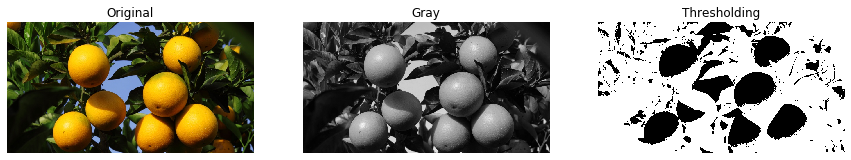

In [ ]:
gray = cv2.cvtColor(img_laranja,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(15,9)) 
plt.subplot(131),plt.imshow(img_laranja,"gray"),plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(gray,"gray"),plt.title('Gray')
plt.axis('off')
plt.subplot(133),plt.imshow(thresh,"gray"),plt.title('Thresholding')
plt.axis('off')
plt.show()

In some articles, it is common to count using colours through the HUE of the image. By converting the image in the HSV format, we use the HUE, Saturation and Value, the image gets an unusual colouring, but the Thresholding counts perfectly the fruits, with only a few noises.

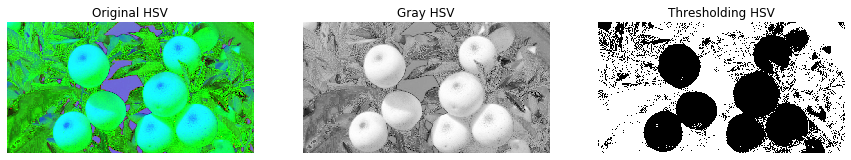

In [ ]:
gray = cv2.cvtColor(img_laranja_HSV,cv2.COLOR_BGR2GRAY)
ret, thresh_hsv = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(15,9)) 
plt.subplot(131),plt.imshow(img_laranja_HSV,"gray"),plt.title('Original HSV')
plt.axis('off')
plt.subplot(132),plt.imshow(gray,"gray"),plt.title('Gray HSV')
plt.axis('off')
plt.subplot(133),plt.imshow(thresh_hsv,"gray"),plt.title('Thresholding HSV')
plt.axis('off')
plt.show()

For the next step, the noises will be removed, the fruits will be counted, and tests for other fruits will be made.

#### b)

In order to remove the noises from the image, the method of dilation, which preserve high values in images, was chosen.
Reminding that the image is "reversed" (bigger pixels are white), or else erosion would be chosen.


(-0.5, 849.5, 449.5, -0.5)

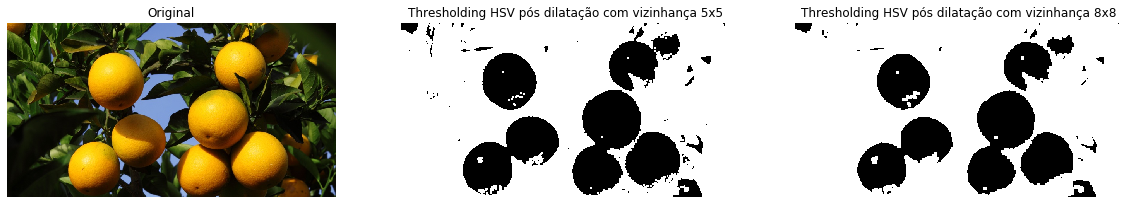

In [ ]:
kernel_5 = np.ones((5, 5), np.uint8) 
kernel_8 = np.ones((8, 8), np.uint8) 
erosion_5_orange = cv2.dilate(thresh_hsv, kernel_5)
erosion_8_orange = cv2.dilate(thresh_hsv, kernel_8)

plt.figure(figsize=(20,12)) 
plt.subplot(131),plt.imshow(img_laranja,"gray"),plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(erosion_5_orange,"gray"),plt.title('Thresholding HSV after dilatation in a 5x5 neighbourhood')
plt.axis('off')
plt.subplot(133),plt.imshow(erosion_8_orange,"gray"),plt.title('Thresholding HSV after dilatation in a 8x8 neighbourhood')
plt.axis('off')

As seen above, only a few noises remain. If we dilate the image too much, we will start losing the oranges in the background, leaving to the user whether they prefer a highest precision on the most visible oranges, which will need to use a bigger neighbourhood, or to see the oranges in the background, but with a chance of noises being identified as fruits, which will require a smaller neighbourhood.

For the counting, both 5x5 and 8x8 neighbourhoods will be used so we can compare their results.

But before counting, this method will be tested with other fruit tree images, using the following function:

In [ ]:
def makeThreshold(img):
    img_HSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_HSV = cv2.cvtColor(img_HSV,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_HSV,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel_5 = np.ones((5, 5), np.uint8) 
    kernel_8 = np.ones((8, 8), np.uint8) 
    erosion_5 = cv2.dilate(thresh, kernel_5)
    erosion_8 = cv2.dilate(thresh, kernel_8)
    plt.figure(figsize=(15,9))
    plt.subplot(231),plt.imshow(img_RGB,"gray"),plt.title('Original')
    plt.axis('off')
    plt.subplot(232),plt.imshow(img_HSV,"gray"),plt.title('Em HSV')
    plt.axis('off')
    plt.subplot(233),plt.imshow(gray_HSV,"gray"),plt.title('Em HSV - Cinza')
    plt.axis('off')
    plt.subplot(234),plt.imshow(thresh,"gray"),plt.title('Thresholding')
    plt.axis('off')
    plt.subplot(235),plt.imshow(erosion_5,"gray"),plt.title('Dilatação com vizinhança 5x5')
    plt.axis('off')
    plt.subplot(236),plt.imshow(erosion_8,"gray"),plt.title('Dilatação com vizinhança 8x8')
    plt.axis('off')
    
    

In [ ]:
img_laranja_ponkan = cv2.imread('./Imagens_ArvoresFrutiferas/Laranja_Ponkan.jpg')
makeThreshold(img_laranja_ponkan)
img_lichia = cv2.imread('./Imagens_ArvoresFrutiferas/Lichia.jpg')
makeThreshold(img_lichia)
img_amora = cv2.imread('./Imagens_ArvoresFrutiferas/Amora.jpg')
makeThreshold(img_amora)
img_pitanga = cv2.imread('./Imagens_ArvoresFrutiferas/Pitanga.jpg')
makeThreshold(img_pitanga)
img_ameixa = cv2.imread('./Imagens_ArvoresFrutiferas/Ameixa.jpg')
makeThreshold(img_ameixa)

imgs = [img_laranja_ponkan, img_lichia, img_amora, img_pitanga, img_ameixa]

The HSV method works better when the fruit colour is closest to yellow or orange, as seen in Pokan Orange and Pitanga, however darker and red fruits, such as Lychee and Blackberry, the HSV method works poorly. And even in the best cases, there are too much noise due to the high density of leaves in most of the images.

In [ ]:
def makeThreshold_RGB(img):
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_RGB = cv2.cvtColor(img_RGB,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_RGB,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel_5 = np.ones((5, 5), np.uint8) 
    kernel_8 = np.ones((8, 8), np.uint8) 
    erosion_5 = cv2.dilate(thresh, kernel_5)
    erosion_8 = cv2.dilate(thresh, kernel_8)
    plt.figure(figsize=(15,9))
    plt.subplot(231),plt.imshow(img_RGB,"gray"),plt.title('Original')
    plt.axis('off')
    plt.subplot(232),plt.imshow(gray_RGB,"gray"),plt.title('Cinza')
    plt.axis('off')
    plt.subplot(233),plt.imshow(thresh,"gray"),plt.title('Thresholding')
    plt.axis('off')
    plt.subplot(235),plt.imshow(erosion_5,"gray"),plt.title('Dilatação com vizinhança 5x5')
    plt.axis('off')
    plt.subplot(236),plt.imshow(erosion_8,"gray"),plt.title('Dilatação com vizinhança 8x8')
    plt.axis('off')

In [ ]:
for img in imgs:
    makeThreshold_RGB(img)

'''
makeThreshold_RGB(img_laranja_ponkan)

makeThreshold_RGB(img_lichia)

makeThreshold_RGB(img_amora)

makeThreshold_RGB(img_pitanga)

makeThreshold_RGB(img_ameixa)
'''

However, when the images are used in RGB, the results are even worse, since no distinction is made between the fruits and the trees, thus this method is discarted for all fruits.

For the next step, a method to prepare the images for counting, and a method for the counting itself, will be sought. 

#### c)

In this step, there was an attempt to remove the green value from the trees, which would leave us with only the fruit colours and a few noises from the sky.

In [ ]:
def removeGreen(img):
    #([20, 80, 20],[160, 255, 150]), #green
    img_HSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    low_green = np.array([20, 80, 20],dtype="uint8")
    high_green = np.array([200, 255, 200],dtype="uint8")
    mask = cv2.inRange(img, low_green, high_green)
    output = cv2.bitwise_and(img, img, mask = mask)
    img_new = cv2.cvtColor(img - output,cv2.COLOR_BGR2HSV)
    gray_HSV = cv2.cvtColor(img_new,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_HSV,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel_5 = np.ones((5, 5), np.uint8) 
    kernel_8 = np.ones((8, 8), np.uint8) 
    erosion_5 = cv2.dilate(thresh, kernel_5)
    erosion_8 = cv2.dilate(thresh, kernel_8)
    plt.figure(figsize=(15,9))
    plt.subplot(231),plt.imshow(img,"gray"),plt.title('Original')
    plt.axis('off')
    plt.subplot(232),plt.imshow(output,"gray"),plt.title('Verde')
    plt.axis('off')
    plt.subplot(233),plt.imshow(img_new,"gray"),plt.title('Nova Imagem')
    plt.axis('off')
    plt.subplot(234),plt.imshow(gray_HSV,"gray"),plt.title('Nova Imagem cinza')
    plt.axis('off')
    plt.subplot(235),plt.imshow(erosion_5,"gray"),plt.title('Dilatação - 5')
    plt.axis('off')
    plt.subplot(236),plt.imshow(erosion_8,"gray"),plt.title('Dilatação - 8')
    plt.axis('off')

for img in imgs:
    removeGreen(img)

When the green mask is opened, the fruits amongst the trees are easily seen, greatly helping with the image manipulation, save some exceptions. Unfortunately for some cases, the background is still creating some noise, thus a second mask eliminating the blue and green from the background is created.

In [ ]:
def removeGreen_Blue(img):
    #([20, 80, 20],[200, 255, 200]), #green
    #([15, 116, 235],[255, 255, 255]), #sky - blue
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_HSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    low_green = np.array([20, 80, 20],dtype="uint8")
    high_green = np.array([200, 255, 200],dtype="uint8")
    low_blue = np.array([15, 116, 235],dtype="uint8")
    high_blue = np.array([255, 255, 255],dtype="uint8")
    mask_g = cv2.inRange(img_RGB, low_green, high_green)
    mask_b = cv2.inRange(img_RGB, low_blue, high_blue)
    output_g = cv2.bitwise_and(img_RGB, img_RGB, mask = mask_g)
    output_b = cv2.bitwise_and(img_RGB, img_RGB, mask = mask_b)
    img_new_b = output_b + output_g
    img_new = cv2.cvtColor(img_new_b,cv2.COLOR_BGR2HSV)
    gray_HSV = cv2.cvtColor(img_new,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_HSV,0,255, cv2.THRESH_OTSU)# cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel_5 = np.ones((5, 5), np.uint8) 
    kernel_8 = np.ones((8, 8), np.uint8) 
    erosion_5 = cv2.dilate(thresh, kernel_5)
    erosion_8 = cv2.dilate(thresh, kernel_8)
    plt.figure(figsize=(15,9))
    plt.subplot(331),plt.imshow(img_RGB,"gray"),plt.title('Original')
    plt.axis('off')
    plt.subplot(332),plt.imshow(output_g,"gray"),plt.title('Verde')
    plt.axis('off')
    plt.subplot(333),plt.imshow(output_b,"gray"),plt.title('Azul')
    plt.axis('off')
    plt.subplot(334),plt.imshow(img_new,"gray"),plt.title('Nova Imagem /Verde+Azul')
    plt.axis('off')
    plt.subplot(335),plt.imshow(gray_HSV,"gray"),plt.title('Nova Imagem em cinza')
    plt.axis('off')
    plt.subplot(336),plt.imshow(thresh,"gray"),plt.title('Thresholding')
    plt.axis('off')
    plt.subplot(337),plt.imshow(erosion_5,"gray"),plt.title('Dilatação - 5')
    plt.axis('off')
    plt.subplot(338),plt.imshow(erosion_8,"gray"),plt.title('Dilatação - 8')
    plt.axis('off')




for img in imgs:
    removeGreen_Blue(img)

Each case will be seen individually so better results will be identified and discussed.

In order to count the fruits, the Orange image will be used, given that its processed image was the best. Using the counting connected components method from cv2, the results from HSV Thresholding is as follows.

objects number is: 42


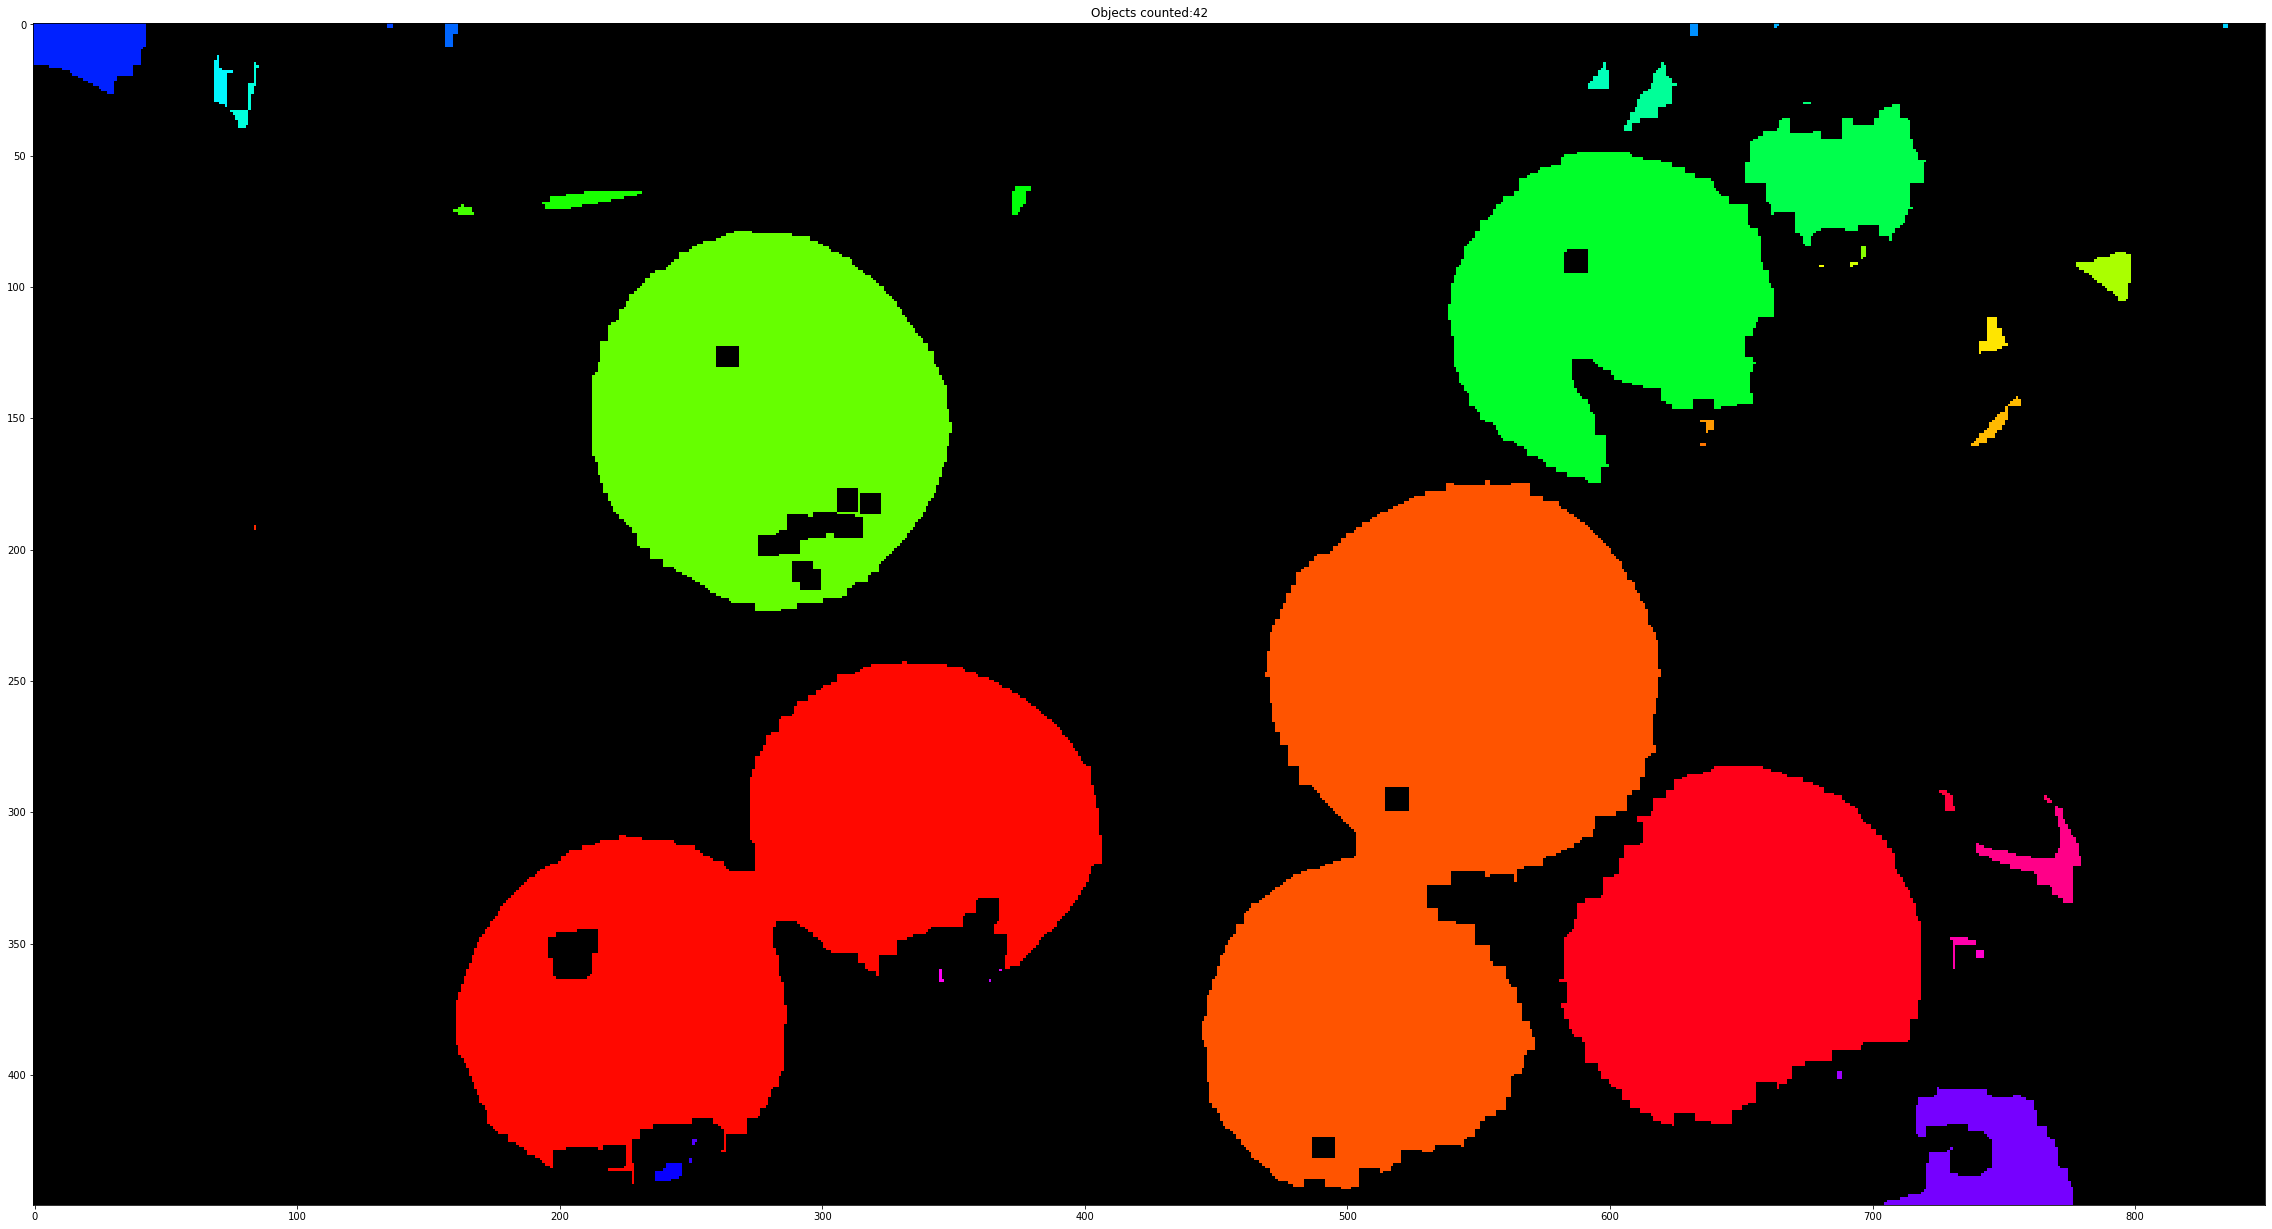

In [ ]:
ret, labels = cv2.connectedComponents(cv2.bitwise_not(erosion_8_orange))
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.figure(figsize=(40,24)) 
plt.subplot(111)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()

Since we still have too much noise, even after treatment with dilation, the program counts every noise as a fruit. More dilations were made to eliminate this problem.

(-0.5, 849.5, 449.5, -0.5)

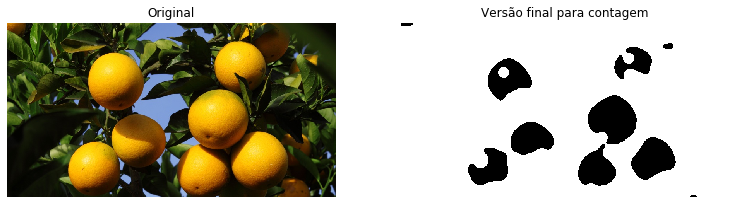

In [ ]:
kernel_20 = np.ones((20, 20), np.uint8) 
erosion_final = cv2.dilate(erosion_8_orange, kernel_20)

orange_final = cv2.medianBlur(erosion_final, 19)

plt.figure(figsize=(20,12)) 
plt.subplot(131),plt.imshow(img_laranja,"gray"),plt.title('Original')
plt.axis('off')
plt.subplot(132),plt.imshow(orange_final,"gray"),plt.title('Final version')
plt.axis('off')

objects number is: 10


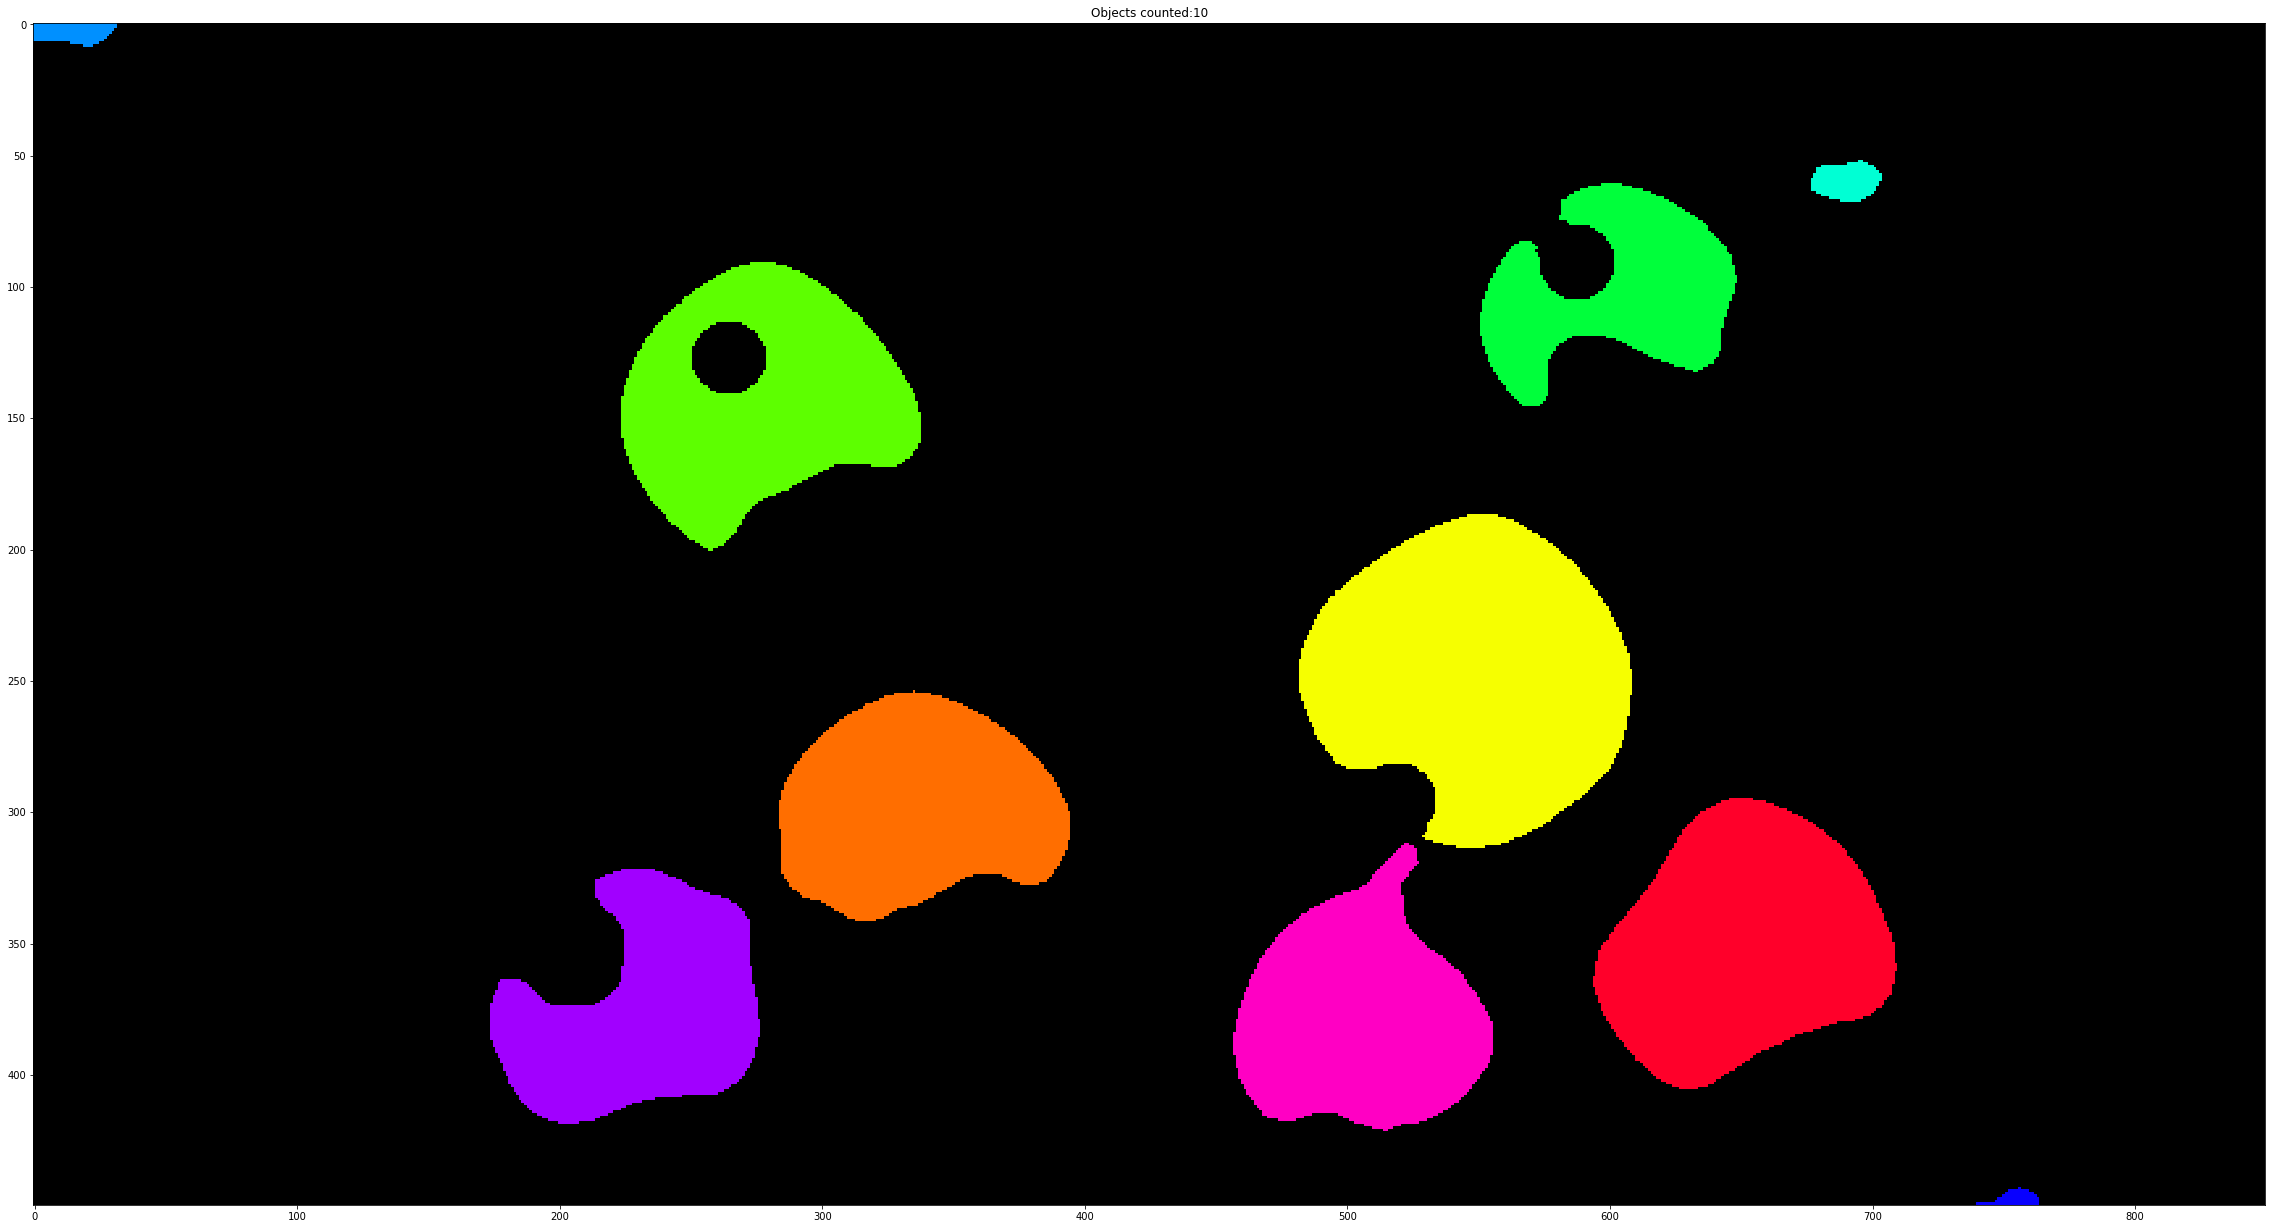

In [ ]:
ret, labels = cv2.connectedComponents(cv2.bitwise_not(orange_final))
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.figure(figsize=(40,24)) 
plt.subplot(111)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()

Although the image is not as the original image (7 fruits in the foreground of the image and 4 in the background), a close number was detected.

In conclusion, the orange image gave a very close number to its original image. However, the image from the other fruit trees did not manage to be counted, given that most of the fruits were too close and would be mistaken as a single fruit. Other counting methods could be used to help, given that the connected components would not function properly in this case.